In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Preprocessing

In [4]:
df= pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.duplicated().sum()  # duplicates identified

24

In [7]:
df.drop_duplicates(inplace=True)   # duplicates removed
df.duplicated().sum()

0

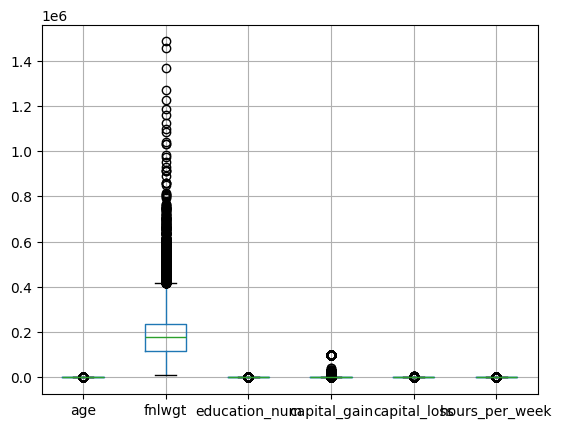

In [8]:
df.boxplot()  # outliers identified
plt.show()

In [9]:
def outliers(df,column):      # outliers removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [10]:
for i in df.select_dtypes(include=['float','int']).columns:
    outliers(df,i)

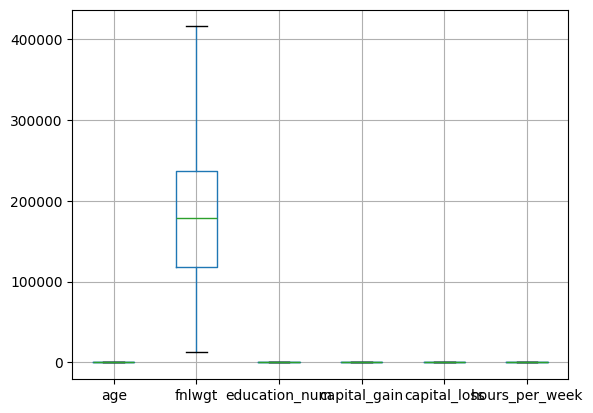

In [11]:
df.boxplot()  # outliers removed
plt.show()

In [12]:
num_df= df.select_dtypes(include=['int','float']).columns  # numerical columns
num_df

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [13]:
std_sca= StandardScaler()   # Standard scaling
df_std_sca= std_sca.fit_transform(df[num_df])
df_std_sca

array([[ 0.03247191, -1.1492095 ,  1.1689182 ,  0.        ,  0.        ,
        -0.19447155],
       [ 0.8440022 , -1.08828431,  1.1689182 ,  0.        ,  0.        ,
        -1.4066403 ],
       [-0.04130357,  0.30300728, -0.45749623,  0.        ,  0.        ,
        -0.19447155],
       ...,
       [ 1.43420604, -0.36707517, -0.45749623,  0.        ,  0.        ,
        -0.19447155],
       [-1.22171125,  0.1541795 , -0.45749623,  0.        ,  0.        ,
        -1.4066403 ],
       [ 0.99155316,  1.06292678, -0.45749623,  0.        ,  0.        ,
        -0.19447155]])

In [14]:
min_max= MinMaxScaler()   # Min-Max scaling
df_min_max= min_max.fit_transform(df[num_df])
df_min_max

array([[0.36065574, 0.16168018, 0.73913043, 0.        , 0.        ,
        0.375     ],
       [0.54098361, 0.17604354, 0.73913043, 0.        , 0.        ,
        0.        ],
       [0.3442623 , 0.50404628, 0.39130435, 0.        , 0.        ,
        0.375     ],
       ...,
       [0.67213115, 0.34607158, 0.39130435, 0.        , 0.        ,
        0.375     ],
       [0.08196721, 0.46895952, 0.39130435, 0.        , 0.        ,
        0.        ],
       [0.57377049, 0.68320044, 0.39130435, 0.        , 0.        ,
        0.375     ]])

In [15]:
df_std_sca= pd.DataFrame(df_std_sca,columns=num_df)
df_min_max= pd.DataFrame(df_min_max,columns=num_df)

In [16]:
df_std_sca.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.032472,-1.149209,1.168918,0.0,0.0,-0.194472
1,0.844002,-1.088284,1.168918,0.0,0.0,-1.406640
2,-0.041304,0.303007,-0.457496,0.0,0.0,-0.194472
3,1.065329,0.503550,-1.270703,0.0,0.0,-0.194472
4,-0.779058,1.593665,1.168918,0.0,0.0,-0.194472


In [17]:
df_min_max.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.360656,0.161680,0.739130,0.0,0.0,0.375
1,0.540984,0.176044,0.739130,0.0,0.0,0.000
2,0.344262,0.504046,0.391304,0.0,0.0,0.375
3,0.590164,0.551325,0.217391,0.0,0.0,0.375
4,0.180328,0.808324,0.739130,0.0,0.0,0.375


## Encoding Techniques

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  object 
 4   education_num   32537 non-null  float64
 5   marital_status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital_gain    32537 non-null  float64
 11  capital_loss    32537 non-null  float64
 12  hours_per_week  32537 non-null  float64
 13  native_country  32537 non-null  object 
 14  income          32537 non-null  object 
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


In [19]:
cat_col= df.select_dtypes(include=['object','category']).columns   # categorical columns
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [20]:
cat_unique_counts= df[cat_col].nunique()  # counting unique values in categorical columns

In [21]:
one_hot_col= cat_unique_counts[cat_unique_counts<=5].index.tolist()  # <5 categories
one_hot_col

['race', 'sex', 'income']

In [22]:
lab_enc_col= cat_unique_counts[cat_unique_counts>5].index.tolist()  # >5 categories
lab_enc_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [23]:
one_hot= OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
label_enc= LabelEncoder()

In [24]:
one_hot_transform= one_hot.fit_transform(df[one_hot_col])   # applying OneHot encoder
one_hot_transform.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
for col in lab_enc_col:                         # applying LabelEncoder
    df[col]= label_enc.fit_transform(df[col])

In [26]:
df[lab_enc_col].head()

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5


## Feature Engineering

In [27]:
df['income_per_hour']= (df['capital_gain']-df['capital_loss'])  # creating new features

In [28]:
df['work_experience']= df['age']-(df['education_num']+6)

In [29]:
df[['income_per_hour','work_experience']].head()

,income_per_hour,work_experience
0,0.0,20.0
1,0.0,31.0
2,0.0,23.0
3,0.0,40.0
4,0.0,9.0


In [30]:
skewness= df[num_df].skew().sort_values(ascending=False)   # skewness
skewness    # education_num is negatively skewed, fnlwgt is positively skewed

,0
fnlwgt,0.548158
age,0.513435
hours_per_week,0.438212
capital_gain,0.000000
capital_loss,0.000000
education_num,-0.033530


In [31]:
df[num_df].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39.0,77516.0,13.0,0.0,0.0,40.0
1,50.0,83311.0,13.0,0.0,0.0,32.5
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0


In [32]:
df['education_num']= np.log1p(df['education_num'])  # applying log transformation
new_skewness= df['education_num'].skew()
new_skewness

-0.8271277313516017

## Feature Selection

In [33]:
isolation_forest= IsolationForest(contamination=0.05,random_state=42)  # IsolationForest used to remove outliers
isolation_forest

IsolationForest(contamination=0.05, random_state=42)

In [34]:
outliers= isolation_forest.fit_predict(df[num_df])
outliers

array([1, 1, 1, ..., 1, 1, 1])

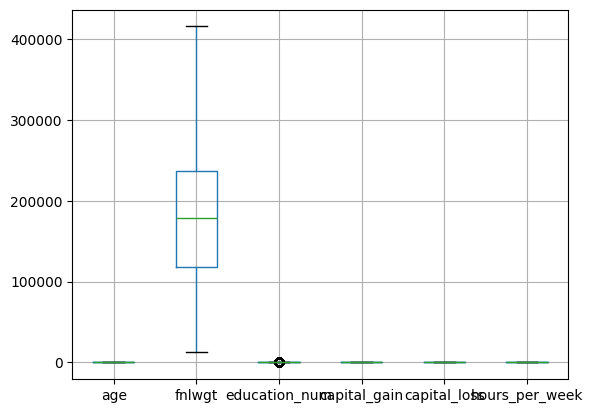

In [35]:
df[num_df].boxplot()
plt.show()

In [36]:
!pip install ppscore

In [37]:
import ppscore as pps

In [38]:
pps_matrix= pps.matrix(df)[['x','y','ppscore']]
pps_matrix

,x,y,ppscore
0,age,age,1.0
1,age,workclass,0.0
2,age,fnlwgt,0.0
3,age,education,0.0
4,age,education_num,0.0
...,...,...,...
284,work_experience,hours_per_week,0.0
285,work_experience,native_country,0.0
286,work_experience,income,0.0
287,work_experience,income_per_hour,0.0


In [40]:
pps_matrix= pps_matrix[pps_matrix['ppscore']>0.2]
pps_matrix

,x,y,ppscore
0,age,age,1.000000
16,age,work_experience,0.829725
18,workclass,workclass,1.000000
36,fnlwgt,fnlwgt,1.000000
54,education,education,1.000000
55,education,education_num,1.000000
65,education,income,0.247122
71,education_num,education,0.984679
72,education_num,education_num,1.000000
82,education_num,income,0.247122


In [41]:
correlation_matrix= df.corr()
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income_per_hour,work_experience
age,1.000000,0.004521,-0.077169,-0.010314,0.017908,-0.268829,-0.020480,-0.265024,NaN,NaN,0.091242,-0.001475,NaN,0.983699
workclass,0.004521,1.000000,-0.017092,0.023456,0.049477,-0.064761,0.254993,-0.090433,NaN,NaN,0.134864,-0.007677,NaN,-0.005098
fnlwgt,-0.077169,-0.017092,1.000000,-0.028236,-0.043612,0.028840,0.001423,0.006718,NaN,NaN,-0.025753,-0.053718,NaN,-0.069400
education,-0.010314,0.023456,-0.028236,1.000000,0.427873,-0.038422,-0.021235,-0.011057,NaN,NaN,0.055903,0.063870,NaN,-0.073523
education_num,0.017908,0.049477,-0.043612,0.427873,1.000000,-0.067258,0.097169,-0.083436,NaN,NaN,0.171678,0.060057,NaN,-0.159411
marital_status,-0.268829,-0.064761,0.028840,-0.038422,-0.067258,1.000000,-0.009814,0.185532,NaN,NaN,-0.190346,-0.023406,NaN,-0.254234
occupation,-0.020480,0.254993,0.001423,-0.021235,0.097169,-0.009814,1.000000,-0.075587,NaN,NaN,0.086525,-0.012406,NaN,-0.040825
relationship,-0.265024,-0.090433,0.006718,-0.011057,-0.083436,0.185532,-0.075587,1.000000,NaN,NaN,-0.276695,-0.005636,NaN,-0.244826
capital_gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
